# 회귀분석에서 변수의 변형
## 데이터를 원하는대로 변형하는 방법
1. 원본 데이터에 변형을 한다. → 두 단계를 거쳐야 하므로 복잡
2. 관계식에 써준다.
 - 기존의 함수를 적용 / 예: log(x)
 - 간단한 산식을 적용 / 예: I(x-1)

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from numpy import log

## 데이터 불러오기
### 안전도 데이터

In [2]:
safety = pd.read_excel('data/safety.xlsx')
safety.head()

,risk,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30
1,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,115,5500,18,22
2,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,3.19,3.4,8.5,110,5500,19,25
3,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,3.13,3.4,8.3,140,5500,17,20
4,2,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,3.50,2.8,8.8,101,5800,23,29


### 중고차 데이터

In [3]:
cars = pd.read_excel('data/small_used_car.xlsx')
cars.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


### 제동거리 데이터

In [4]:
braking = pd.read_excel('data/speed.xlsx')
braking.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


---
## 1. 원본 데이터에 변형

In [5]:
cars['jm_year'] = cars.year - 2010
cars.head()

,mileage,model,price,year,my_car_damage,other_car_damage,jm_year
0,63608,K3,970,2017,0,564596,7
1,69336,K3,1130,2015,1839700,1140150,5
2,36000,K3,1380,2016,446520,2244910,6
3,19029,K3,1390,2017,889000,4196110,7
4,97090,K3,760,2015,2339137,2029570,5


In [6]:
ols('price ~ jm_year', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           1.39e-70
Time:                        12:36:56   Log-Likelihood:                -1820.2
No. Observations:                 274   AIC:                             3644.
Df Residuals:                     272   BIC:                             3652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    505.0926     18.172     27.794      0.000     469.316     540.869
jm_year      106.4745      4.357     24.439      0.000      97.897     115.052
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.774
Skew:                           0.447   Prob(JB):                      0.00754
Kurtosis:                       3.236   Cond. No.                         6.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
## 2. 관계식에서 함수 적용
Python의 관계식에 함수를 사용하면 함수를 먼저 적용한 후 분석에 투입
```python
y ~ log(x)
log(y) ~ x
```

### `length`에 log 함수를 적용한 다음에 회귀분석에 독립변수로 포함

In [7]:
ols('risk ~ log(length)', data = safety).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     19.53
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           1.84e-05
Time:                        12:36:56   Log-Likelihood:                -243.86
No. Observations:                 159   AIC:                             491.7
Df Residuals:                     157   BIC:                             497.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      31.0794      6.866      4.527      0.000      17.518      44.641
log(length)    -5.8946      1.334     -4.420      0.000      -8.529      -3.260
==============================================================================
Omnibus:                       10.528   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.388
Skew:                           0.654   Prob(JB):                      0.00337
Kurtosis:                       2.908   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
## 3. I 함수
I 함수를 사용하면 덧셈, 뺄셈 등의 계산을 할 수 있음<br>
I 함수는 있는 그대로 처리하라는 뜻 (Identity = 똑같이) 의 함수
```python
y ~ I(x + z)
```
- x와 z를 각각 독립변수로 투입하는 대신, 두 변수의 합을 독립변수로 투입

### 예시
원본 데이터에는 `국어`, `영어`, `수학` 점수가 있는데 나는 총점을 분석에 넣고 싶다.<br>
그러면 `I(국어 + 영어 + 수학)`라고 하면 국어, 영어, 수학의 총점이 분석에 포함

### `length`와 `width`의 합을 하나의 독립변수로 회귀분석에 투입
- `length`와 `width`의 합을 회귀분석에 포함
- `I()`가 없으면 `length`와 `width`를 각각 회귀분석의 독립변수로 넣음

In [8]:
safety.length + safety.width

0      242.8
1      243.0
2      264.1
3      264.1
4      241.6
       ...  
154    257.7
155    257.6
156    257.7
157    257.7
158    257.7
Length: 159, dtype: float64

In [9]:
ols('risk ~ I(length + width)', data = safety).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     18.66
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           2.76e-05
Time:                        12:36:56   Log-Likelihood:                -244.25
No. Observations:                 159   AIC:                             492.5
Df Residuals:                     157   BIC:                             498.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.7480      1.626      4.766      0.000       4.537      10.959
I(length + width)    -0.0295      0.007     -4.320      0.000      -0.043      -0.016
==============================================================================
Omnibus:                       10.173   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.954
Skew:                           0.641   Prob(JB):                      0.00418
Kurtosis:                       2.905   Cond. No.                     4.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 단위가 inch인 `length`를 cm 단위로 바꾸기
2.54를 곱해서 모형에 넣는다.

In [10]:
ols('risk ~ I(length * 2.54)', data = safety).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     20.01
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           1.47e-05
Time:                        12:36:56   Log-Likelihood:                -243.64
No. Observations:                 159   AIC:                             491.3
Df Residuals:                     157   BIC:                             497.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.7385      1.345      5.011      0.000       4.082       9.395
I(length * 2.54)    -0.0137      0.003     -4.474      0.000      -0.020      -0.008
==============================================================================
Omnibus:                       10.632   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.510
Skew:                           0.658   Prob(JB):                      0.00317
Kurtosis:                       2.915   Cond. No.                     6.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R제곱나 절편 등의 변화는 없지만, 기울기가 변함

In [11]:
safety_ori = ols('risk ~ length', data = safety).fit()
safety_std = ols('risk ~ I(length * 2.54)', data = safety).fit()

In [12]:
print('오리지널 R제곱: ' + str(safety_ori.rsquared))
print('변형한 R제곱: ' + str(safety_std.rsquared))
print('오리지널 수정된 R제곱: ' + str(safety_ori.rsquared_adj))
print('변형한 수정된 R제곱: ' + str(safety_std.rsquared_adj))
print('오리지널 AIC: ' + str(safety_ori.aic))
print('변형한 AIC: ' + str(safety_std.aic))
print('오리지널 BIC: ' + str(safety_ori.bic))
print('변형한 BIC: ' + str(safety_std.bic))

오리지널 R제곱: 0.11306860628694282
변형한 R제곱: 0.11306860628694282
오리지널 수정된 R제곱: 0.10741936174099975
변형한 수정된 R제곱: 0.10741936174099975
오리지널 AIC: 491.2819329801859
변형한 AIC: 491.28193298018596
오리지널 BIC: 497.4197413846264
변형한 BIC: 497.41974138462643


In [13]:
print(safety_ori.params)
print('-' * 30)
print(safety_std.params)

Intercept    6.738493
length      -0.034815
dtype: float64
------------------------------
Intercept           6.738493
I(length * 2.54)   -0.013707
dtype: float64


### 단위가 다른 독립변수와 종속변수의 회귀분석
- 가격(`price`)은 만 원 단위, 보험처리된 손해액(`my_car_damage`)은 원 단위로 되어 있음
- 단위 차이가 많이 나기 때문에 기울기가 -4.522e-05와 같이 매우 작게 된다.

In [14]:
ols('price ~ my_car_damage', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     57.85
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           4.63e-13
Time:                        12:36:57   Log-Likelihood:                -1953.0
No. Observations:                 274   AIC:                             3910.
Df Residuals:                     272   BIC:                             3917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       958.5554     22.899     41.860      0.000     913.473    1003.637
my_car_damage -4.522e-05   5.95e-06     -7.606      0.000   -5.69e-05   -3.35e-05
==============================================================================
Omnibus:                        6.427   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.363
Skew:                           0.372   Prob(JB):                       0.0415
Kurtosis:                       3.054   Cond. No.                     4.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### `my_car_damage`의 단위를 만원 단위로 변경하여 단위를 맞추기
단위를 똑같이 만원 단위로 맞춰주기 위해 보험 처리 이력은 10000으로 나눠준다

In [15]:
ols('price ~ I(my_car_damage / 10000)', data = cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     57.85
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           4.63e-13
Time:                        12:36:57   Log-Likelihood:                -1953.0
No. Observations:                 274   AIC:                             3910.
Df Residuals:                     272   BIC:                             3917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  958.5554     22.899     41.860      0.000     913.473    1003.637
I(my_car_damage / 10000)    -0.4522      0.059     -7.606      0.000      -0.569      -0.335
==============================================================================
Omnibus:                        6.427   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.363
Skew:                           0.372   Prob(JB):                       0.0415
Kurtosis:                       3.054   Cond. No.                         482.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 참고

In [16]:
-4.522e+05

-452200.0

In [17]:
-0.0000000000000000004522

-4.522e-19

---
## 4. 수평 이동
그래프를 수평으로 평행 이동하는 것과 동일
```python
y ~ I(x - 1)
```
- 절편의 위치를 x = 0에서 x = 1로 이동
- x = 0보다 x = 1이 의미있는 경우, 해석이 쉬워짐
- 기울기에는 변화가 없음

### 절편을 바꿔도 분석은 같다!
### 그냥 연식(`year`)을 이용해서 회귀분석
- 그냥 연식을 이용해서 회귀분석을 하면 서기 0년의 가격이 절편이 된다. (절편 = -21억)
- <b>2010~2019 사이에 있는 데이터 직선을 주욱 연장을 해서 생기는 현상</b>

In [18]:
ols('price ~ year', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           1.39e-70
Time:                        12:36:57   Log-Likelihood:                -1820.2
No. Observations:                 274   AIC:                             3644.
Df Residuals:                     272   BIC:                             3652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.135e+05   8771.400    -24.341      0.000   -2.31e+05   -1.96e+05
year         106.4745      4.357     24.439      0.000      97.897     115.052
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.774
Skew:                           0.447   Prob(JB):                      0.00754
Kurtosis:                       3.236   Cond. No.                     1.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### `year`에서 2010을 빼면, 2010년도가 0년도가 됨
- 2010년을 기준 연도(=0년)으로 변경하여 분석
- 절편은 2010년 가격이 됨. (꼭 2010년도로 해야 하는 건 아님. 분석가 마음)
- 2010년을 기준으로 1년마다 106만원씩 증가

In [19]:
ols('price ~ I(year - 2010)', data = cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           1.39e-70
Time:                        12:36:57   Log-Likelihood:                -1820.2
No. Observations:                 274   AIC:                             3644.
Df Residuals:                     272   BIC:                             3652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        505.0926     18.172     27.794      0.000     469.316     540.869
I(year - 2010)   106.4745      4.357     24.439      0.000      97.897     115.052
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.774
Skew:                           0.447   Prob(JB):                      0.00754
Kurtosis:                       3.236   Cond. No.                         6.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2010년의 가격을 찾는 또 다른 방법

In [20]:
res = ols('price ~ year', data=cars).fit()

In [21]:
res.predict(pd.DataFrame([{'year':2010}]))

0    505.092617
dtype: float64

### 참고: `params`
절편과 기울기를 구함

In [22]:
res.params

Intercept   -213508.644366
year            106.474496
dtype: float64

---
## 5. 절편의 고정
절편을 0으로 고정
```python
y ~ 0 + x
```
- 자주 사용되지는 않고, 논리적으로 꼭 필요한 경우에만 사용

In [23]:
safety_0 = ols('risk ~ 0 + length', data=safety).fit()
safety_0.params

length    0.004095
dtype: float64

## 5-1. 절편을 임의의 값으로 고정
절편으로 0으로 고정한 다음 수직 이동하는 것
```python
I(y - 1) ~ 0 + x
```
- 절편을 1로 고정하는 것과 같음
- 실제로 사용될 일 없음

---
## 5-2. 절편의 고정과 2차식 실습
### `제동거리 데이터`에서 `speed`를 독립변수로 `dist`를 종속변수로 회귀분석을 해보자.
절편은 0으로 고정하고, 속도 `speed`와 속도의 제곱 `speed ** 2`을 모두 독립변수에 추가하여 2차식 형태로 회귀분석을 하자.

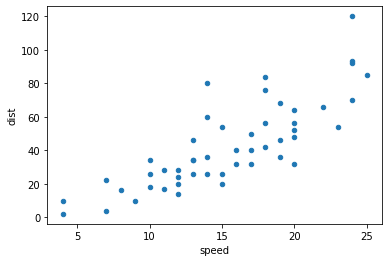

In [24]:
braking.plot.scatter('speed', 'dist')

In [25]:
ols('dist ~ 0 + I(speed ** 2) + speed', data=braking).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   dist   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              252.8
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                    3.27e-26
Time:                        12:36:58   Log-Likelihood:                         -205.40
No. Observations:                  50   AIC:                                      414.8
Df Residuals:                      48   BIC:                                      418.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
I(speed ** 2)     0.0901      0.029      3.067      0.004       0.031       0.149
speed             1.2390      0.560      2.213      0.032       0.113       2.365
==============================================================================
Omnibus:                       10.823   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.587
Skew:                           0.971   Prob(JB):                      0.00502
Kurtosis:                       4.144   Cond. No.                         81.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 제동거리의 식
```python
dist = 0.0901*(speed**2) + 1.2390*speed
```
속도의 제곱의 계수 `0.0901`는 유의수준 5%에서 통계적으로 유의하다.

### 1차식 형태와 2차식 형태 중에 어떤 모형으로 분석하는 것이 나을까?

In [26]:
linear = ols('dist ~ 0 + speed', data=braking).fit() # 1차식
quadratic = ols('dist ~ 0 + I(speed ** 2) + speed', data=braking).fit() # 2차식
extra = ols('dist ~ 0 + I(speed ** 2)', data=braking).fit() # 2차식에서 speed를 뺀 식

In [27]:
linear.rsquared, quadratic.rsquared, extra.rsquared

(0.8962893058052057, 0.9132837749569258, 0.9044388915230833)

In [28]:
linear.rsquared_adj, quadratic.rsquared_adj, extra.rsquared_adj

(0.8941727610257201, 0.9096705989134644, 0.9024886648194728)

In [29]:
linear.aic, quadratic.aic, extra.aic

(421.749836661686, 414.8016251688076, 417.65787096151394)

In [30]:
linear.bic, quadratic.bic, extra.bic

(423.66185966711413, 418.6256711796639, 419.56989396694206)

#### 2차식 형태로 분석하는 것이 더 낫다.
둘 다 독립변수, 이차항만 독립변수, 일차항만 독립변수 순으로 모델의 설명력이 높다.

### 참고: 이차항
```python
y ~ I(x ** 2) + x
```

In [31]:
2 ** 5  # 2의 5승

32

In [32]:
2 ^ 5  # bitwise and - 거의 쓸일 없음

7

---
## 6. 표준화
변수의 원래 단위를 없애고 표준편차를 단위로 하는 것
```python
(X−μ)/σ
```
- μ: 평균
- σ: 표준편차
- 평균 = 0, 표준편차 = 1이 됨
- 서로 다른 평균과 표준편차를 가진 변수를 비교하기 쉽게 해줌

### `I(X - 평균)`: 표준화의 효과
1. X가 평균일 때가 절편으로 바뀌게 됨
 - 원래는 길이 = 0일 때가 절편
 - 길이 = 평균일 때가 절편으로 바뀜
2. 서로 단위가 다르거나 퍼진 정도가 다른 변수들을 동일 기준에서 기울기 비교 가능

## 6-1. 표준화 회귀계수
```python
scale(y) ~ scale(x) + scale(z)
```
- 해석의 편의를 위해서 `scale(y)` 대신 `y`를 사용할 수도 있음
- 서로 다른 단위의 독립변수들끼리 비교가 가능

### 길이(`length`)와 폭(`width`)을 독립변수로 한 회귀분석: 표준화X vs 표준화

길이의 평균과 표준편차

In [33]:
safety.length.mean(), safety.length.std()

(172.41383647798736, 11.523176853998827)

폭의 평균과 표준편차

In [34]:
safety.width.mean(), safety.width.std()

(65.60754716981134, 1.9478825624742644)

### 표준화를 안한 분석

In [35]:
ols('risk ~ length + width', data = safety).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     11.28
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           2.67e-05
Time:                        12:36:59   Log-Likelihood:                -242.45
No. Observations:                 159   AIC:                             490.9
Df Residuals:                     156   BIC:                             500.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4168      3.712      0.382      0.703      -5.915       8.749
length        -0.0531      0.014     -3.738      0.000      -0.081      -0.025
width          0.1292      0.084      1.537      0.126      -0.037       0.295
==============================================================================
Omnibus:                       10.622   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.467
Skew:                           0.657   Prob(JB):                      0.00324
Kurtosis:                       2.937   Cond. No.                     7.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 표준화를 안했을 때의 식
```python
risk = -0.0531 * length + 0.1292 * width + 1.4168
```
- 자동차의 길이가 0이고 폭이 0이면, 위험도는 1.4168

### 표준화를 한 분석

In [36]:
ols('risk ~ scale(length) + scale(width)', data=safety).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     11.28
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           2.67e-05
Time:                        12:36:59   Log-Likelihood:                -242.45
No. Observations:                 159   AIC:                             490.9
Df Residuals:                     156   BIC:                             500.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7358      0.089      8.267      0.000       0.560       0.912
scale(length)    -0.6103      0.163     -3.738      0.000      -0.933      -0.288
scale(width)      0.2510      0.163      1.537      0.126      -0.072       0.573
==============================================================================
Omnibus:                       10.622   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.467
Skew:                           0.657   Prob(JB):                      0.00324
Kurtosis:                       2.937   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 표준화를 했을 때의 식
```python
risk = -0.6103 * (length-평균) + 0.2510 * (width-평균) + 0.7358
```
- 길이와 폭이 평균일 때, 위험도가 0.7358
- 동일 선상에서 길이(`length`)와 폭(`width`)을 비교 가능

### 표준화했을 때와 안했을 때 비교
- 표준화한 기울기: -0.6103 (1 표준편차 증가할 때의 종속변수 변화)
- 원래의 기울기: -0.0531 (= 표준화한 기울기 / 표준편차) (1인치 증가할 때의 종속변수 변화)

In [37]:
-0.6103/11.523176853998827

-0.05296282507268912

## 6-2. 표준화 실습
### 중고차 데이터에서 `year`와 `mileage`를 표준화하여 `price`를 예측하자.

In [38]:
cars_std = ols('price ~ scale(year) + scale(mileage)', data=cars).fit()
cars_std.params

Intercept         853.660584
scale(year)       218.100576
scale(mileage)   -100.204447
dtype: float64

```python
price = 853 + 218 * s(year) - 100 * s(mileage)
```
#### 평균적인 연식(`year`)에 평균적인 주행거리(`mileage`)를 가진 중고차의 가격(`price`) = `853`

#### `year`가 1표준편차 증가할 때 `price`는 `218.1006` 만큼 변한다.

#### `mileage`가 1표준편차 증가할 때 `price`는 `-100.2044` 만큼 변한다.

### 표준화한 모형의 R제곱과 독립변수를 표준화하지 않은 모형의 R제곱은 똑같다.

In [39]:
cars_ori = ols('price ~ year + mileage', data=cars).fit()

print('표준화한 모형의 R제곱: ' + str(cars_std.rsquared))
print('표준화하지 않은 모형의 R제곱: ' + str(cars_ori.rsquared))

표준화한 모형의 R제곱: 0.7486005251564052
표준화하지 않은 모형의 R제곱: 0.7486005251564052


### 표준화를 한다 = 단위를 바꾼다
- `price` = 단위가 만원 → 기울기도 만원 단위
- `scale(price)` = 단위가 표준편차

## 7. 서열로 변환 후 회귀분석
독립변수 또는 종속변수를 서열로 변환하여 회귀분석
```python
y.rank() ~ x.rank()
```
- 스피어만 상관계수의 아이디어와 동일
 - 스피어만 상관계수: 등수로 바꾼 후 피어슨 상관계수를 구함
- 일부 비선형적 관계가 존재할 경우에 사용
- 최솟값~최댓값의 범위를 벗어나는 사례의 경우에는 예측이 불가능 (기준 데이터가 없기 때문)
- 자주 사용하지는 않지만, 구간이 제각각인 소득 등을 분석할 때 이상치를 제거하기 위해 사용됨

### `length`와 `width`를 각각 순서대로 등수를 매겨서, 그 등수로 회귀분석

In [40]:
ols('risk ~ length.rank() + width.rank()', data=safety).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     14.63
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           1.50e-06
Time:                        12:36:59   Log-Likelihood:                -239.51
No. Observations:                 159   AIC:                             485.0
Df Residuals:                     156   BIC:                             494.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3187      0.180      7.313      0.000       0.963       1.675
length.rank()    -0.0185      0.004     -4.742      0.000      -0.026      -0.011
width.rank()      0.0112      0.004      2.868      0.005       0.003       0.019
==============================================================================
Omnibus:                        7.575   Durbin-Watson:                   0.873
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.910
Skew:                           0.542   Prob(JB):                       0.0192
Kurtosis:                       2.865   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""